In [ ]:
import numpy
import pandas as pd

# Phone use dataframe
phone_use_df = pd.read_csv('master_student_phone_use_data/phone_use_data.csv')
phone_use_df = phone_use_df.drop_duplicates()

# App categories dataframe
app_categories = pd.read_csv('master_student_phone_use_data/app_categories.csv')
app_categories = app_categories.rename(columns = {'app_id' : 'application'})

# Phone use dataframe combined with app categories dataframe
phone_use_category = pd.merge(phone_use_df, app_categories, how='left', on=['application'])

# Add time column (hour), duration of app opened and day
phone_use_category['startHour'] = phone_use_category['startTime'].str[11:13].astype(int)
phone_use_category['duration'] = phone_use_category['endTimeMillis'] - phone_use_category['startTimeMillis']
phone_use_category['day'] = phone_use_category['startTime'].str[:8]

# Remove rows with application 'com.ethica.logger' and 'com.android.systemui' (= everything that is no application)
rows_to_delete = [i for i in range(len(phone_use_category)) \
                  if phone_use_category['application'][i] == 'com.ethica.logger' \
                  or phone_use_category['application'][i] == 'com.android.systemui']
phone_use_category = phone_use_category.drop(rows_to_delete, axis = 0)

# Use other name to keep the previous dataframe as well
dataframe = phone_use_category

# Sort by user id and by time
dataframe = dataframe.sort_values(['user_id', 'startTime'], ascending=[True, True])

# Change indexes
dataframe = dataframe.set_index([pd.Index(range(len(dataframe)))])

# New columns: Previous application opened, previous category, and duration previous app (all per day)
for i in range(len(dataframe)):
    if i == 0:
        dataframe['previous_app_opened'] = 'First_app'
        dataframe['previous_app_duration'] = 0
    else:
        if dataframe['day'][i] == dataframe['day'][i-1]:
            dataframe['previous_app_opened'][i] = dataframe['application'][i-1]
            dataframe['previous_app_duration'][i] = dataframe['duration'][i-1]
        else:
            dataframe['previous_app_opened'][i] = 'First_app'
            dataframe['previous_app_duration'][i] = 0

# Keep columns that are necessary for the research
final_dataframe = dataframe[["user_id", "startHour", "notification", "previous_app_opened",\
                             "previous_app_duration", "category"]]

C:\Users\jorin\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jorin\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jorin\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jorin\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value i

In [11]:
phone_use_category = final_dataframe

### Change input data to numbers

In [12]:
# Convert notification boolean to integer
phone_use_category['notification'] = phone_use_category['notification'].astype('int')

# Create dummies for previous_app_opened
dummies = pd.get_dummies(phone_use_category.previous_app_opened)
phone_use_category_with_dummies = phone_use_category.join(dummies)

phone_use_category = phone_use_category_with_dummies

C:\Users\jorin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Change output columns to category top ...

In [13]:
order_of_categories = phone_use_category['category'].value_counts().index.tolist()

def change_category_to_top(number):
    top_categories = order_of_categories[:number]
    category_column = phone_use_category['category'].copy()
    for i in range(len(category_column)):
        if category_column[i] not in top_categories:
            category_column[i] = 'Other'
    return category_column

category_1 = change_category_to_top(1)
phone_use_category['category_top_1'] = category_1

category_2 = change_category_to_top(2)
phone_use_category['category_top_2'] = category_2

category_3 = change_category_to_top(3)
phone_use_category['category_top_3'] = category_3

category_5 = change_category_to_top(5)
phone_use_category['category_top_5'] = category_5

category_10 = change_category_to_top(10)
phone_use_category['category_top_10'] = category_10


phone_use_category

,user_id,startHour,notification,previous_app_opened,previous_app_duration,category,First_app,ae.etisalat.smiles,air.com.hypah.io.slither,air.com.lunime.gachalife,...,vivekagarwal.playwithdb,wa.memes.stickerapps,works.jubilee.timetree,xsoftstudio.cpu.widget,yio.tro.achikaps,category_top_1,category_top_2,category_top_3,category_top_5,category_top_10
0,10161,15,0,First_app,0,Communication,1,0,0,0,...,0,0,0,0,0,Communication,Communication,Communication,Communication,Communication
1,10161,15,0,com.android.chrome,7595,Lifestyle,0,0,0,0,...,0,0,0,0,0,Other,Other,Other,Other,Other
2,10161,15,0,be.ugent.mobiledna,5207,Communication,0,0,0,0,...,0,0,0,0,0,Communication,Communication,Communication,Communication,Communication
3,10161,15,0,com.android.chrome,451024,Background Process,0,0,0,0,...,0,0,0,0,0,Other,Other,Other,Other,Background Process
4,10161,15,0,com.android.vending,34034,Lifestyle,0,0,0,0,...,0,0,0,0,0,Other,Other,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484702,10947,21,0,com.snapchat.android,52365,Music & Audio,0,0,0,0,...,0,0,0,0,0,Other,Other,Other,Music & Audio,Music & Audio
484703,10947,21,0,com.spotify.music,9207,Music & Audio,0,0,0,0,...,0,0,0,0,0,Other,Other,Other,Music & Audio,Music & Audio
484704,10947,22,0,com.spotify.music,30240,Music & Audio,0,0,0,0,...,0,0,0,0,0,Other,Other,Other,Music & Audio,Music & Audio
484705,10947,22,0,com.spotify.music,1197,Social,0,0,0,0,...,0,0,0,0,0,Other,Social,Social,Social,Social


### Export to csv

In [14]:
phone_use_category.to_csv('final_dataframe.csv')

# Import this csv and load into numpy arrays

In [1]:
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split

phone_use_category = pd.read_csv('final_dataframe.csv', index_col=0)

# Change NaN rows to Low Frequency App
phone_use_category = phone_use_category.fillna('Low Frequency App')


## Input data
# Keep only needed columns
input_data = phone_use_category.drop(['user_id', 'previous_app_opened', 'category', 'category_top_1', 'category_top_2', \
                                      'category_top_3', 'category_top_5', 'category_top_10'], axis=1)

# Change every column to integer (as not all columns are seen as integer yet)
input_data = input_data.astype('int')

# Change to array
input_data = np.array(input_data)


## Output data
all_categories = np.array(phone_use_category['category'])
top_1_categories = np.array(phone_use_category['category_top_1'])
top_3_categories = np.array(phone_use_category['category_top_3'])
top_5_categories = np.array(phone_use_category['category_top_5'])
top_10_categories = np.array(phone_use_category['category_top_10'])


## Split to train and test data
all_output_data = all_categories
top1_output_data = top_1_categories
top3_output_data = top_3_categories
top5_output_data = top_5_categories
top10_output_data = top_10_categories

X_train, X_test, y_train_all, y_test_all = train_test_split(input_data, all_output_data, \
                                                                    test_size = 0.33, random_state = 42)
X_train, X_test, y_train_top1, y_test_top1 = train_test_split(input_data, top1_output_data, \
                                                                        test_size = 0.33, random_state = 42)
X_train, X_test, y_train_top3, y_test_top3 = train_test_split(input_data, top3_output_data, \
                                                                        test_size = 0.33, random_state = 42)
X_train, X_test, y_train_top5, y_test_top5 = train_test_split(input_data, top5_output_data, \
                                                                        test_size = 0.33, random_state = 42)
X_train, X_test, y_train_top10, y_test_top10 = train_test_split(input_data, top10_output_data, \
                                                                        test_size = 0.33, random_state = 42)

In [ ]:
import pickle
with open('X_train', 'wb') as a1:
    pickle.dump(X_train, a1)
with open('X_test', 'wb') as a2:
    pickle.dump(X_test, a2)
    
with open('y_test_all', 'wb') as b1:
    pickle.dump(y_test_all, b1)
with open('y_test_top1', 'wb') as b2:
    pickle.dump(y_test_top1, b2)
with open('y_test_top3', 'wb') as b3:
    pickle.dump(y_test_top3, b3)
with open('y_test_top5', 'wb') as b4:
    pickle.dump(y_test_top5, b4)
with open('y_test_top10', 'wb') as b5:
    pickle.dump(y_test_top10, b5)

with open('y_train_all', 'wb') as c1:
    pickle.dump(y_train_all, c1)
with open('y_train_top1', 'wb') as c2:
    pickle.dump(y_train_top1, c2)
with open('y_train_top3', 'wb') as c3:
    pickle.dump(y_train_top3, c3)
with open('y_train_top5', 'wb') as c4:
    pickle.dump(y_train_top5, c4)
with open('y_train_top10', 'wb') as c5:
    pickle.dump(y_train_top10, c5)

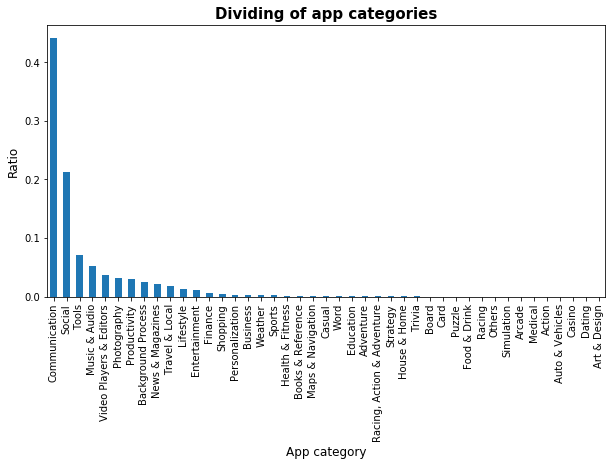

In [11]:
# import numpy
# import pandas as pd
# from sklearn.model_selection import train_test_split

# phone_use_category = pd.read_csv('final_dataframe.csv', index_col=0)

import matplotlib.pylab as plt 

plt.figure(figsize=(10,5))
phone_use_category['category'].value_counts(normalize = True).plot(kind='bar', color = 'blue')
plt.xlabel('App category', fontsize = 12)
plt.ylabel('Ratio', fontsize = 12)
plt.title('Dividing of app categories', fontsize = 15, fontweight = 'bold')
plt.show()

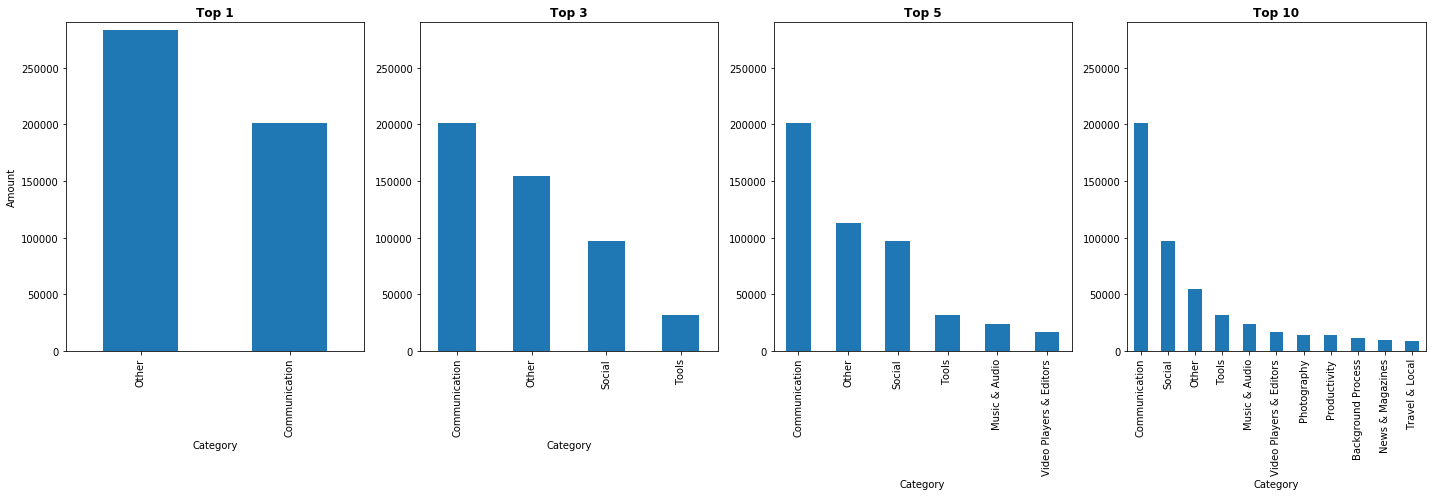

In [12]:
plt.figure(figsize=(20,7))

plt.subplot(141), 
phone_use_category['category_top_1'].value_counts().plot(kind='bar'), 
plt.title('Top 1', fontweight = 'bold'),
plt.xlabel('Category'), plt.ylabel('Amount')
plt.ylim(0,290000)

plt.subplot(142), 
phone_use_category['category_top_3'].value_counts().plot(kind='bar'), 
plt.title('Top 3', fontweight = 'bold'),
plt.xlabel('Category')
plt.ylim(0,290000)

plt.subplot(143), 
phone_use_category['category_top_5'].value_counts().plot(kind='bar'), 
plt.title('Top 5', fontweight = 'bold'),
plt.xlabel('Category')
plt.ylim(0,290000)

plt.subplot(144), 
phone_use_category['category_top_10'].value_counts().plot(kind='bar'), 
plt.title('Top 10', fontweight = 'bold'),
plt.xlabel('Category')
plt.ylim(0,290000)

plt.tight_layout()

In [5]:
phone_use_df = pd.read_csv('master_student_phone_use_data/phone_use_data.csv')
phone_use_df = phone_use_df.drop_duplicates()

# App categories dataframe
app_categories = pd.read_csv('master_student_phone_use_data/app_categories.csv')
app_categories = app_categories.rename(columns = {'app_id' : 'application'})

# Phone use dataframe combined with app categories dataframe
phone_use_category = pd.merge(phone_use_df, app_categories, how='left', on=['application'])


In [16]:
# Communication
[phone_use_category['application'][i] for i in range(len(phone_use_category)) if phone_use_category['category'][i] == 'Shopping']

['com.alibaba.aliexpresshd',
 'de.stocard.stocard',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.amazon.mShop.android.shopping',
 'com.alibaba.aliexpresshd',
 'nl.marktplaats.android',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba.aliexpresshd',
 'com.alibaba